Exact solution (numpy.linalg.solve): [ 3.  -2.5  7. ]

Jacobi:
  tol=   0.001  iters=  4  x=[ 3.0000225  -2.50000266  6.99998104]
  tol=   1e-06  iters=  7  x=[ 3.  -2.5  7. ]
  tol=   1e-09  iters=  9  x=[ 3.  -2.5  7. ]

Gauss-Seidel:
  tol=   0.001  iters=  4  x=[ 3.00000035 -2.50000004  6.99999999]
  tol=   1e-06  iters=  5  x=[ 3.  -2.5  7. ]
  tol=   1e-09  iters=  7  x=[ 3.  -2.5  7. ]


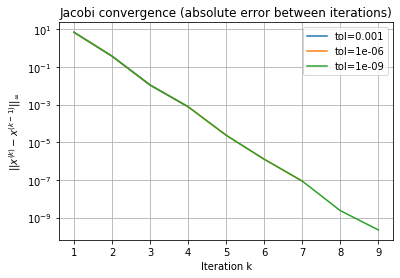

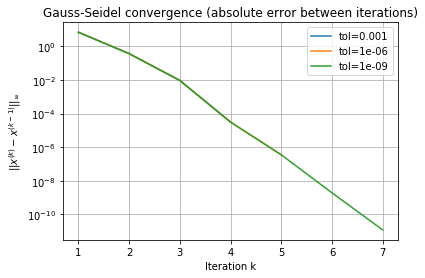

In [8]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [3.0, -0.1, -0.2],
    [0.1, 7.0, -0.3],
    [0.3, -0.2, 10.0]
], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)
x0 = np.zeros(3)

import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [3.0, -0.1, -0.2],
    [0.1, 7.0, -0.3],
    [0.3, -0.2, 10.0]
], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)
x0 = np.zeros(3)

def jacobi(A, b, x0, tol=1e-6, max_iter=100000):
    D = np.diag(np.diag(A))
    R = A - D
    Dinv = np.diag(1.0 / np.diag(D))

    x_prev = x0.astype(float).copy()
    errors = []

    for k in range(1, max_iter + 1):
        x_new = Dinv @ (b - R @ x_prev)
        err = np.linalg.norm(x_new - x_prev, ord=np.inf)  
        errors.append(err)
        if err < tol:
            return x_new, k, np.array(errors)
        x_prev = x_new

    return x_prev, max_iter, np.array(errors)

def gauss_seidel(A, b, x0, tol=1e-6, max_iter=100000):
    x = x0.astype(float).copy()
    n = len(b)
    errors = []

    for k in range(1, max_iter + 1):
        x_old = x.copy()

        for i in range(n):
            s1 = A[i, :i] @ x[:i]          
            s2 = A[i, i+1:] @ x_old[i+1:]   
            x[i] = (b[i] - s1 - s2) / A[i, i]

        err = np.linalg.norm(x - x_old, ord=np.inf)
        errors.append(err)
        if err < tol:
            return x, k, np.array(errors)

    return x, max_iter, np.array(errors)

tols = [1e-3, 1e-6, 1e-9]

x_star = np.linalg.solve(A, b)
print("Exact solution (numpy.linalg.solve):", x_star)

results = {}

for name, solver in [("Jacobi", jacobi), ("Gauss-Seidel", gauss_seidel)]:
    results[name] = {}
    print(f"\n{name}:")
    for tol in tols:
        x, iters, errs = solver(A, b, x0, tol=tol)
        results[name][tol] = (x, iters, errs)
        print(f"  tol={tol:>8g}  iters={iters:>3d}  x={x}")

def plot_convergence(method_name):
    plt.figure()
    for tol in tols:
        errs = results[method_name][tol][2]
        plt.semilogy(range(1, len(errs) + 1), errs, label=f"tol={tol:g}")
    plt.xlabel("Iteration k")
    plt.ylabel(r"$||x^{(k)} - x^{(k-1)}||_\infty$")
    plt.title(f"{method_name} convergence (absolute error between iterations)")
    plt.grid(True, which="both")
    plt.legend()
    plt.show()

plot_convergence("Jacobi")
plot_convergence("Gauss-Seidel")

Discussion:
smaller tolerance -> more iterations. we force the update size to be smaller before updating.
gauss-seidel usually needs fewer iterations than jacobi because it uses th newest available values inside each iteration.
tightening the tolerance from 10^-3 to 10^-9 increases iterations roughly linear by a few steps and gauss-seidel stays ahead
therefore, tolerance affects the number of iterations needed for convergence by determining how long the algorithm has to run for. 